In [88]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# 4.1,2 Clustering & A Clustering Objective

1. "The goal of clustering is to group of partition vectors into k groups or clusters, with the vectors in each group close to each other"
2. Objective: A single value used to judge "choice of clustering": choose k

In [89]:
#Just an Example

#given a tuple of vectors, and representatives for groups of vectors,
#what is the average distance each vector has from a representative

x = np.array([[0,1],[1,0],[-1,1]])
reps = np.array([[1,1],[0,0]])

# the function jclust is our objective function, the k-means algorithm tries to minimize it
# for a fixed number of reps
jclust = lambda x, reps, assignment: np.average([npl.norm(x[i] - reps[assignment[i]])**2 for i in range(len(x))])
jclust(x,reps,[0,1,0]),jclust(x,reps,[0,0,1]) #assignments are 0 indexed

#How can we select the center-most (most minimal distance between vectors)
#representative?

(2.0, 1.3333333333333333)

# 4.3 k-Means Algorithm

"Iterating between choosing group representatives and choosing group assignments"

#### Pseduo:
1. Initialize a group of representatives either by: 1) randomly selecting from set of vectors, or 2) randomly group vectors and create mean vectors to be used as representatives.
2. Partition vectors in k amount of groups. Assign a group for every vector associated with the nearest representative.
    If there are any ties for vector assignments, choose the group with the smallest j value of the ties.
    If there is an empty group, remove from list of k groups.
    If there are two iterations without changes in vector assignments, stop algorithm.
3. Update representatives. For every group from 1-k set the corresponding representative to be the mean of the vectors in that group.
    If Jclust gets small, stop algorithm.

In [90]:
import random

def kmeans(x,k,maxiters = 1000, tolerance = 1e-4):  #what is x?
    N = len(x) #amount of vectors
    if k >= N:
        print("k shouldn't be larger than N")       #Why should k be smaller then N?
        return
    n = len(x[0]) #dimension of each vector
    distances = np.zeros(N)                         #will store distances of each pt to nearest rep
    progress = []                                   # array will be used to visualize J updates later
    jPrev = np.Infinity                             #placeholder for ending condition: 
                                                    #if previous J and current J haven't changed much,finish
    
    reps = random.sample(x.tolist(), k)             #choose k random points from the data set
    assignment = np.zeros(N)                        #assigning cluster, for each point it will store what cluster it is in.
    
    for itr in range(maxiters):                     #assign each point to the cluster with nearest rep and update reps multiple times
        new_reps = np.array([np.zeros(n) for _ in range(N)]);      #initalize
        group_sizes = np.zeros(N);                                 #initalize
        for i in range(N):                          #for each x find 'nearest' rep. using square square distance (why can we do this?)  
                                                    #tests each x against each rep.
            closest = np.argmin([np.inner(x[i] - reps[j], x[i] - reps[j]) for j in range(k)]); # sqrt is order preserving, so compare the square norm instead
            distances[i] = npl.norm(x[i] - reps[closest]);
            assignment[i] = closest;
            new_reps[closest] += x[i];                          #adding up all elements in each group.
            group_sizes[closest] += 1;
        J = np.inner(distances, distances) / N
        progress.append([J,itr])
        if (itr > 1) and (abs(J-jPrev) < (tolerance * J)):      #test if relative change in objective function is smaller than toerance
            return assignment, reps, progress                   #once the results aren't really improving, stop the loop.
        
        for j in range(k):                                      #Address the case where one group has no members.
            if group_sizes[j] == 0:
                reps[j] = x[np.random.randint(N)].copy()
            else:
                reps[j] = new_reps[j] / group_sizes[j]          #update reps
        
        jPrev = J
    return assignment, reps, progress                           #assignment - what group each element in, reps, how close.

Let's initialize a data set containing 3 random clusters

In [91]:
#Generating Blobs  - Can be tried multiple times

import math;

# get n clusters with j points each
def get_n_blobs(n, j):
    angle = 2 * math.pi / n
    size = angle / 6
    for i in range(n):
        mid = np.array([math.cos(i * angle), math.sin(i * angle)])
        new_points = np.array([mid + size * np.random.randn(2) for _ in range(j)])
        data = new_points if i == 0 else np.concatenate((data, new_points))
    return data

X = get_n_blobs(3, 100) # try changing n or j


((-2.0, 2.0), (-2.0, 2.0))

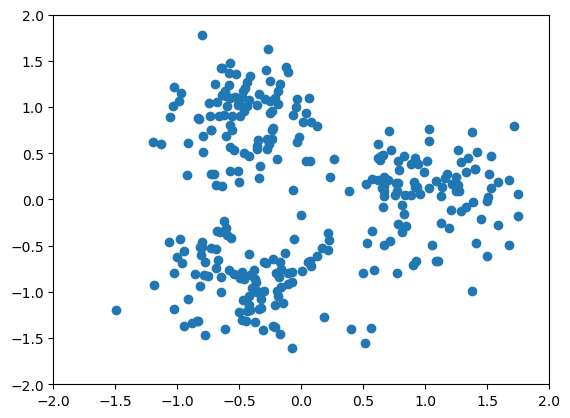

In [92]:
plt.scatter([x[0] for x in X],[x[1] for x in X])
plt.xlim([-2,2]),plt.ylim([-2,2])

Here we'll run the k-means algorithm on this data set with k=2,3,4 and plot each result

In [93]:
k=2
assignment, reps, progress = kmeans(X,k)
for p in progress:
    print("Iteration "+str(p[1])+": Jclust = "+str(p[0]))

Iteration 0: Jclust = 1.7036285496914874
Iteration 1: Jclust = 0.7133946947206773
Iteration 2: Jclust = 0.7115722253805795
Iteration 3: Jclust = 0.7107978659460927
Iteration 4: Jclust = 0.7107978659460927


((-2.0, 2.0), (-2.0, 2.0))

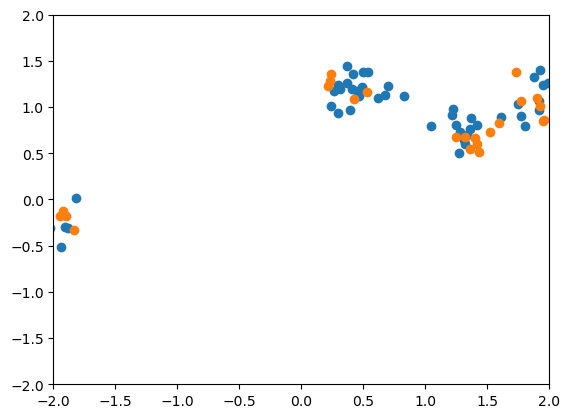

In [115]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.xlim([-2,2]),plt.ylim([-2,2])

((-2.0, 2.0), (-2.0, 2.0))

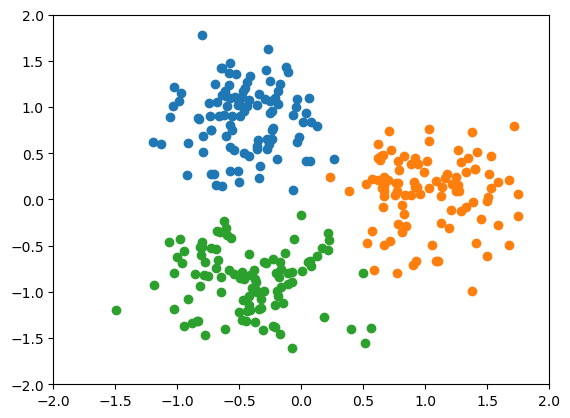

In [95]:
k=3
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.xlim([-2,2]),plt.ylim([-2,2])

((-2.0, 2.0), (-2.0, 2.0))

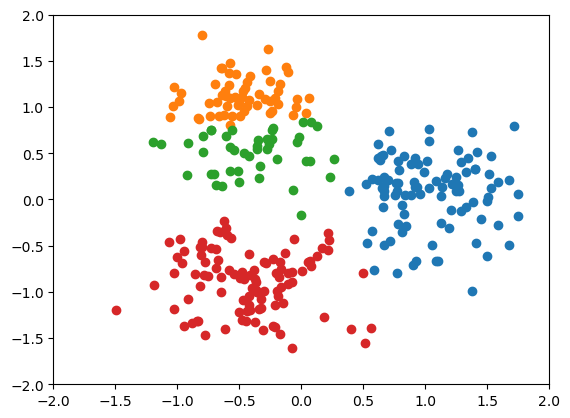

In [96]:
k=4
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.scatter([c[0] for c in groups[3]],[c[1] for c in groups[3]])
plt.xlim([-2,2]),plt.ylim([-2,2])
# plt.show()
# plt.scatter([i[1] for i in progress],[i[0] for i in progress])
# plt.show()

## Activity for the Quiz: Identifying the number of clusters

We can use the k-means algorithm to try to answer the question of how many clusters a data set has. 

The idea is to run the k-means algorithm with different values of k and see which gives the "best" result.

In [97]:
# this function will run the algorithm with k=2,...,n-1
def test_k_vals(n, data, trials):
    results = []
    for i in range(2, n):
        # depending on the initial conditions we might get better or worse results
        # so run a few trials and take the best result
        def run_trial():
            assignment, reps, progress = kmeans(data, i);
            return progress[len(progress) - 1][0]
        best = min([run_trial() for _ in range(trials)])
        
        results.append(best)
        
    return results

Ok, lets try it with a data set with 5 clusters

((-2.0, 2.0), (-2.0, 2.0))

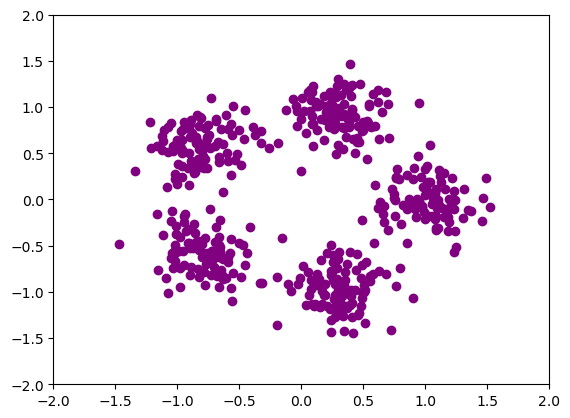

In [122]:
D = get_n_blobs(5, 100)          #number of blobs, and number of points
plt.scatter([x[0] for x in D], [x[1] for x in D], c='purple')
plt.xlim([-2,2]),plt.ylim([-2,2])

Here we plot the result of `test_k_vals` (it can take a minute or so for the function to finish running)

Text(0, 0.5, 'result (y)')

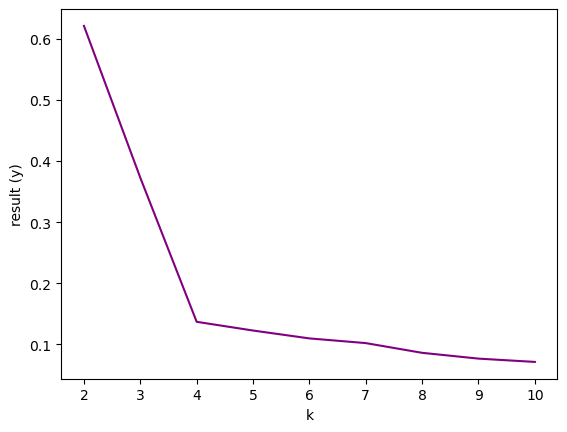

In [120]:
d_result = test_k_vals(11, D, 3)
plt.plot(range(2, 11), d_result, c='purple')
plt.xlabel('k')
plt.ylabel('result (y)')

Hmm, that isn't very helpful. Just from looking at this graph it isn't clear which value of $k$ we should choose as the number of clusters.

In order to get information about the number of clusters we are going to have to learn more about these graphs.

Let's see what happens when we use data sets that don't have any clusters. Maybe we can find a pattern that will help us identify clusters.

In [121]:
# we will start with 3 data sets that don't have any inherent clustering
X = 0.5 * np.array([np.random.randn(2) for _ in range(300)]) 
Y = 0.15 * np.array([[i // 20 - 10, i % 20 - 10] for i in range(400)])

def random_unit():
    x = np.random.randn(2)
    return x / npl.norm(x)
    
Z = np.array([random_unit() for _ in range(0, 300)])

Data set $X$ has a 2-dimensional gaussian distribution

((-2.0, 2.0), (-2.0, 2.0))

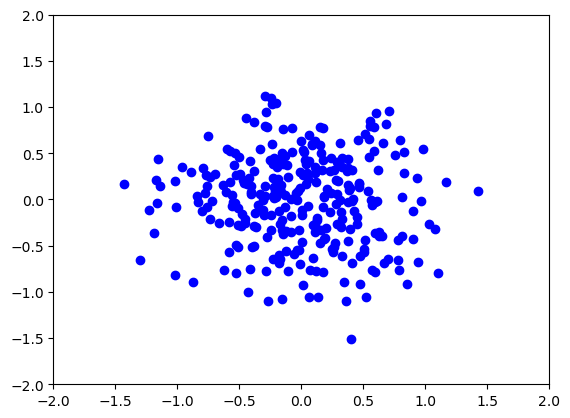

In [101]:
plt.scatter([x[0] for x in X],[x[1] for x in X], c='blue')
plt.xlim([-2,2]),plt.ylim([-2,2])

Data set $Y$ is a regular grid of points

((-2.0, 2.0), (-2.0, 2.0))

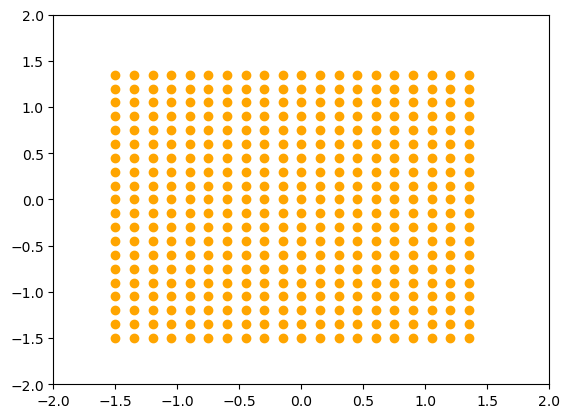

In [102]:
plt.scatter([x[0] for x in Y],[x[1] for x in Y], c='orange')
plt.xlim([-2,2]),plt.ylim([-2,2])

Data set $Z$ is a circle

((-2.0, 2.0), (-2.0, 2.0))

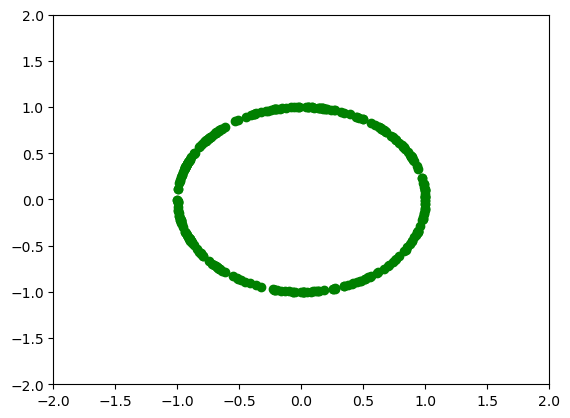

In [103]:
plt.scatter([x[0] for x in Z],[x[1] for x in Z], c='green') # Z is a set of concentric circles
plt.xlim([-2,2]),plt.ylim([-2,2])

Now let's run `test_k_vals` on these data sets

In [104]:
max_k = 11
x_result = test_k_vals(11, X, 3)
y_result = test_k_vals(11, Y, 3)
z_result = test_k_vals(11, Z, 3)

Text(0, 0.5, 'result (y)')

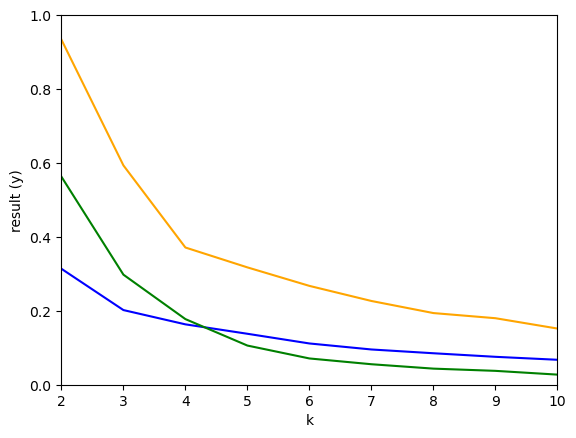

In [105]:
plt.plot(range(2, 11), x_result, c='blue')
plt.plot(range(2, 11), y_result, c='orange')
plt.plot(range(2, 11), z_result, c='green')
plt.xlim([2,10]),plt.ylim([0,1])
plt.xlabel('k')
plt.ylabel('result (y)')

There might be a power law relationship of the form $y=ak^b$ for some constants $a$ and $b$. 

We can use a log-log plot to turn this relationship into a linear one. If power law holds, then we can take logs on both sides to obtain $\log(y)=\log(a)+b\log(k)$. 

This means that if we plot these curves on a log-log plot, we should get straight lines with slope equal to $b$.

Text(0, 0.5, 'result (y)')

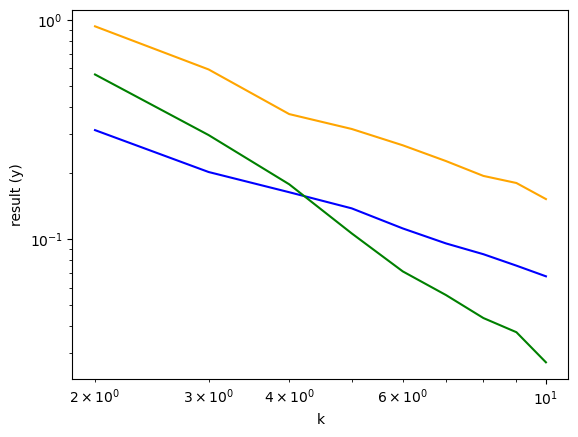

In [106]:
plt.plot(range(2, max_k), x_result, c='blue')
plt.plot(range(2, max_k), y_result, c='orange')
plt.plot(range(2, max_k), z_result, c='green')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('result (y)')

This result is good in some ways and bad in others. While we do get (roughly) straight lines, the lines don't all have the same slope.

Let's return to the data set from before with clusters. If we plot this on a log-log plot, we can clearly see a jump between $k=4$ and $k=5$

Text(0, 0.5, 'result (y)')

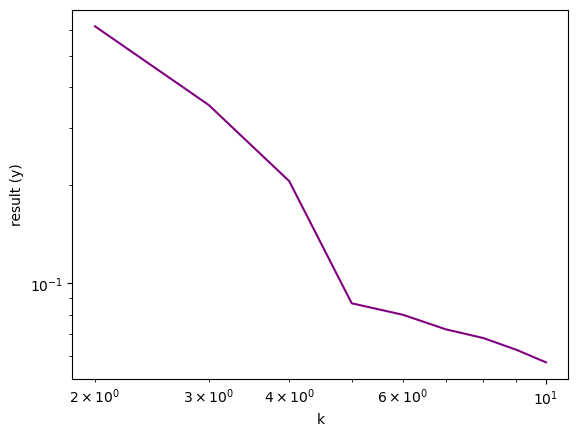

In [107]:
plt.plot(range(2, max_k), d_result, c='purple')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel('result (y)')

So now we have a pretty good idea of how to guess the number of clusters - we run `test_k_vals`, plot the data on a log-log plot, and look for distinct jumps where the value decreases faster than the power-law model would predict.

Now lets check this idea by applying it to some unknown data sets. Theses will be data sets in 4 dimensions, so we can't find the number of clusters just by looking at them.

In [108]:
# the functions to generate these data sets are in an external notebook
%run ./Ch.04\ Data\ Sets.ipynb

# these data sets are partially random - they might not be exactly the same every time
X = data_set_1()
Y = data_set_2()
Z = data_set_3()
max_k = 16

These data sets aren't as clean as the ones from before, so I've increased the number of trials to get less noise in the output. You can try changing trials to a smaller number to see what happens. This also means that it will probably take several minutes for this to run.

In [109]:
trials = 50
x_result = test_k_vals(16, X, trials)
y_result = test_k_vals(16, Y, trials)
z_result = test_k_vals(16, Z, trials)

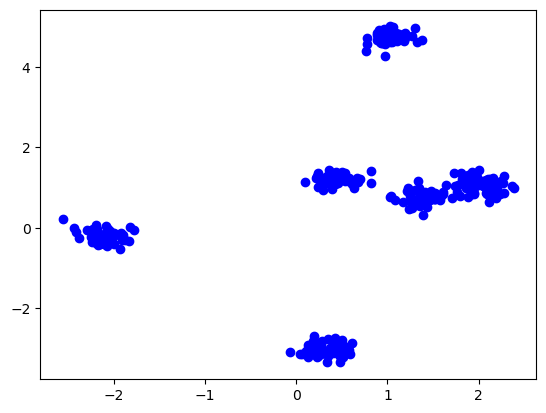

In [110]:
plt.scatter([x[0] for x in X], [x[1] for x in X], c="blue")

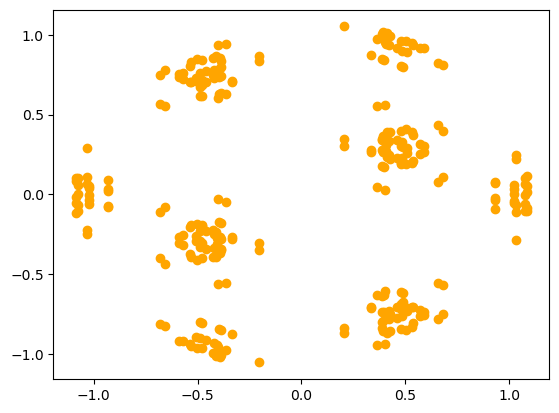

In [111]:
plt.scatter([y[0] for y in Y], [y[1] for y in Y], c="orange")

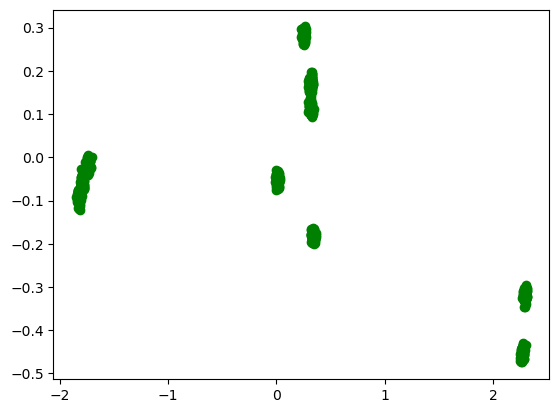

In [112]:
plt.scatter([z[0] for z in Z], [z[1] for z in Z], c="green")

Text(0, 0.5, 'result (y)')

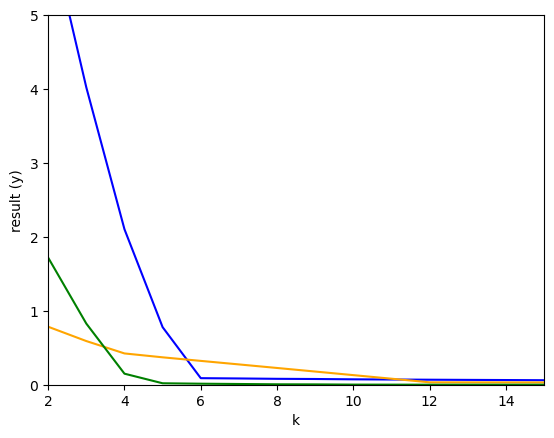

In [113]:
# show j-clust curve
#ax = plt.axes(xscale='log', yscale='log')
#ax.set_xticks(range(2, max_k))
# this is a hack to get the axis labels and grid lines to look better
#if max_k == 16:
#    ax.set_xticklabels([2, 3, 4, '', 6, '', 8, '', 10, '', 12, '', 14, ''])

plt.plot(range(2, max_k), x_result, c='blue')
plt.plot(range(2, max_k), y_result, c='orange')
plt.plot(range(2, max_k), z_result, c='green')

plt.xlim([2,15]),plt.ylim([0,5])
plt.xlabel('k')
plt.ylabel('result (y)')

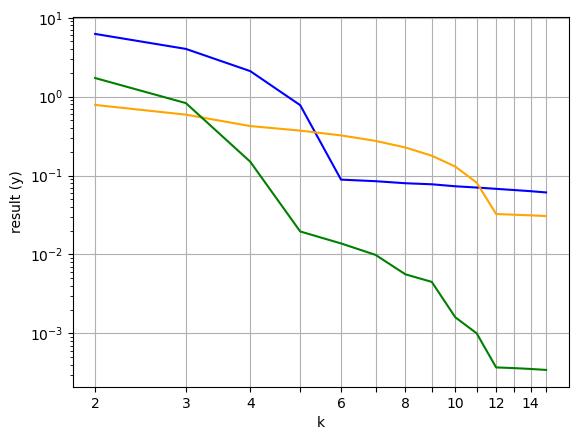

In [114]:
ax = plt.axes(xscale='log', yscale='log')
ax.set_xticks(range(2, max_k))
# this is a hack to get the axis labels and grid lines to look better
if max_k == 16:
    ax.set_xticklabels([2, 3, 4, '', 6, '', 8, '', 10, '', 12, '', 14, ''])

plt.plot(range(2, max_k), x_result, c='blue')
plt.plot(range(2, max_k), y_result, c='orange')
plt.plot(range(2, max_k), z_result, c='green')

plt.xlabel('k')
plt.ylabel('result (y)')
plt.grid(True)

We can see sharp bends in the graph, which tell us something about clustering. We guess data set $X$ has 6 clusters, data set $Y$ has 12 clusters, but data set $Z$ is less clear. From the graph, we could claim that there are either 5 or 11 clusters. We can conclude that it is likely that data set $Z$ has $5$ large clusters, each of which splits into some number of smaller clusters, with 11 small clusters in total. (Note that because the data sets are random, there is a small chance that something different could happen)

We can also see that the line stops being straight before the actual number of clusters. This is most clear in the orange line (data set $Y$). We can see that around $k=6$, the line starts to curve downwards from linear. If there are 12 clusters, then at $k=7$ at least one of the groups found by the $k$-means algorithm will correspond to a single cluster in the data set, but for $k=6$ and below it is likely that the optimal solution has all groups formed by multiple clusters. So it makes sense that the clustering of the data set start to affect the result around $\frac12 k$. 

As the value of $k$ continues to increase, we see more of the groups corresponding to single clusters. This continues to cause the line to curve down until we run out of clusters (in the orange line, this happens at $k=12$). When this happens the curve suddenly gets less steep, which gives us a good indication of what the number of clusters in the data set is.